## Importing necessary packages

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

## Helper Function

### Function to read image from URL

In [0]:
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

### Function to visualize edge detection in single frame

In [0]:
def visualise_edge_detection(conv_obj, type_detection):
  plt.figure(figsize=(10,10))
  nrows, ncols, index = (3,3,1)

  img_idx = range(len(conv_obj))

  for i in img_idx:
      plt.subplot(nrows, ncols, index)
      plt.grid(False)
      plt.imshow(conv_obj[i])
      plt.title(type_detection[i], fontsize = 15)
      plt.xticks([]), 
      plt.yticks([])
      plt.tight_layout()

      index = index+1

  plt.show()
  
  return

### Reading image from Url

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

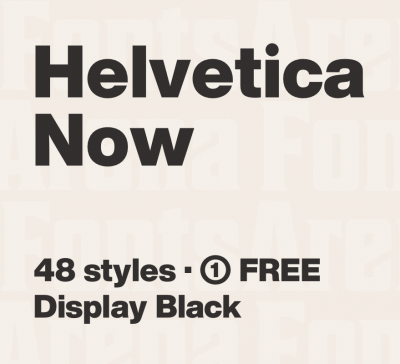

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

## Canny edge detector

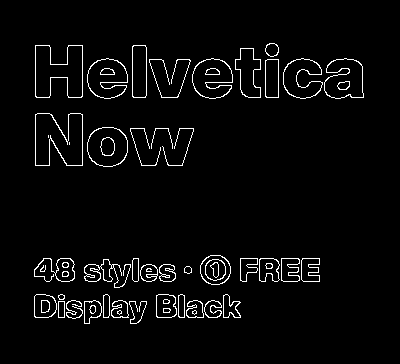

In [0]:
edges = cv2.Canny(image,100,200)
cv2_imshow(edges)

## Edge Detection and its importance in image processing
An edge in am image is a significant local change in the image intensity, usually associated with the discontinuity in either the image intensity or the 1st derivative of the image intensity.

Edge detection is the case of trying to find the regions in an image where we have a sharp change in intensity or a sharp change in color. A high value indicates steep change and a low value indicates shallow change. 

**Importance of edge detection:**
Sometimes, an image can be classified just on the basis of the edges.Edges create the basic structure of the image, so detecting edges lead to the detection of image shape which finally helps in classifying the image. That is why edge detection is a crucial step in CNN.

![Imgur](https://i.imgur.com/WW9KCtV.jpg)    ![Imgur](https://i.imgur.com/xiszzho.jpg)


## Vertical Edge Detection



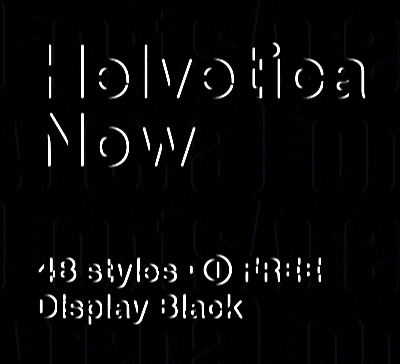

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel_ver = np.float32([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

dst = cv2.filter2D(image,-1,kernel_ver)
cv2_imshow(dst)

## Horizontal Edge Detection




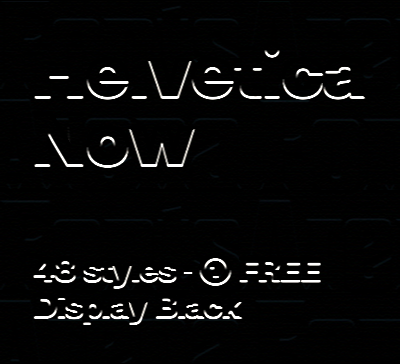

In [0]:
kernel_hor = np.float32([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]
                        ])

conv_hor = cv2.filter2D(image, -1, kernel_hor)
cv2_imshow(conv_hor)

## 45 Degree Angle Detector

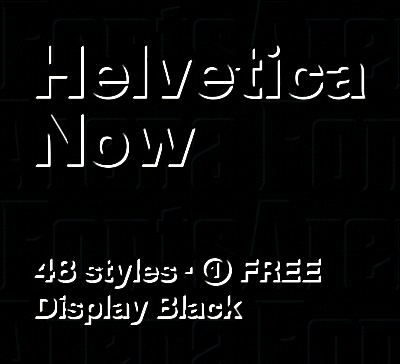

In [0]:
kernel_45 = np.float32([[-2,-1, 0],
                        [-1, 0, 1],
                        [ 0, 1, 2]
                       ])

conv_45 = cv2.filter2D(image, -1, kernel_45)
cv2_imshow(conv_45)

## 135 Degree Angle Detector

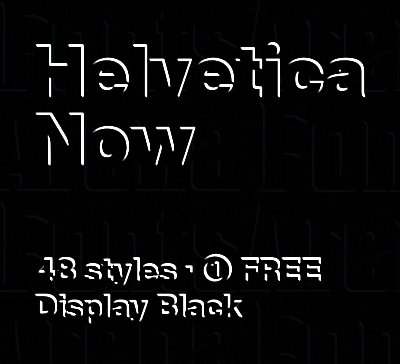

In [0]:
kernel_135 = np.float32([[ 0, 1, 2],
                         [-1, 0, 1],
                         [-2,-1, 0]
                        ])

conv_135 = cv2.filter2D(image, -1, kernel_135)
cv2_imshow(conv_135)

## Blur Kernel

 A blurred image have smooth. A filter used for blurring is called low pass filter, because it allows low frequency to enter and stop high frequency. Here frequency means the change of pixel value. Around edge pixel value changes rapidly as blur image is smooth so high frequency should be filtered out.

For image blurring,  a pixel value should be close to neighbor value, so filter with all value '1' is used for blurring. Filter values should be normalized, otherwise value of pixel may result in more contrast.

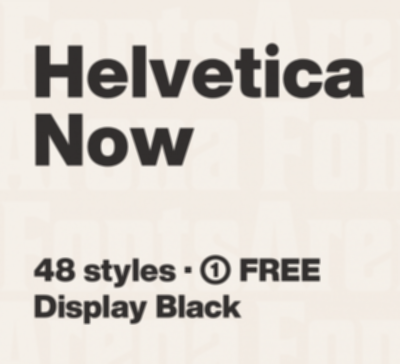

In [0]:
kernel_blur = np.ones((3,3), np.float)/(9.0)

conv_blur = cv2.filter2D(image, -1, kernel_blur)
cv2_imshow(conv_blur)

## Sharpen Kernel

Enhancing the high frequency components (edges) of image is called image sharpening. It helps leads to an imporovement in the image quality.

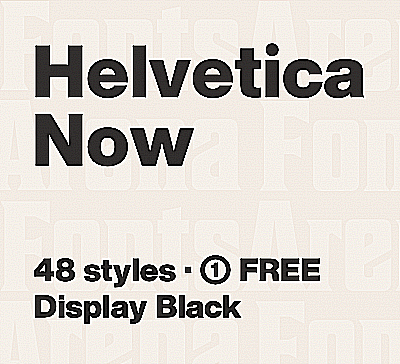

In [0]:
kernel_sharp = np.float32([[-1,-1, -1],
                           [-1, 9, -1],
                           [-1,-1, -1]
                          ])

conv_sharp = cv2.filter2D(image, -1, kernel_sharp)
cv2_imshow(conv_sharp)

## Identity function (doesn't do anything)

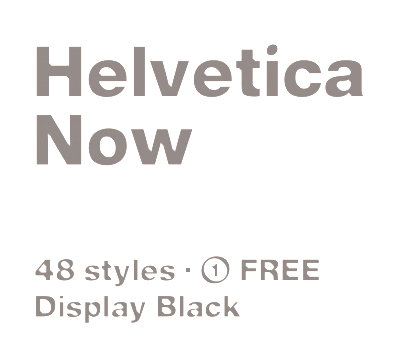

In [0]:
kernel_identity = np.identity(3)

conv_identity = cv2.filter2D(image, -1, x)
cv2_imshow(conv_identity)

## Visualise the Edge Detection

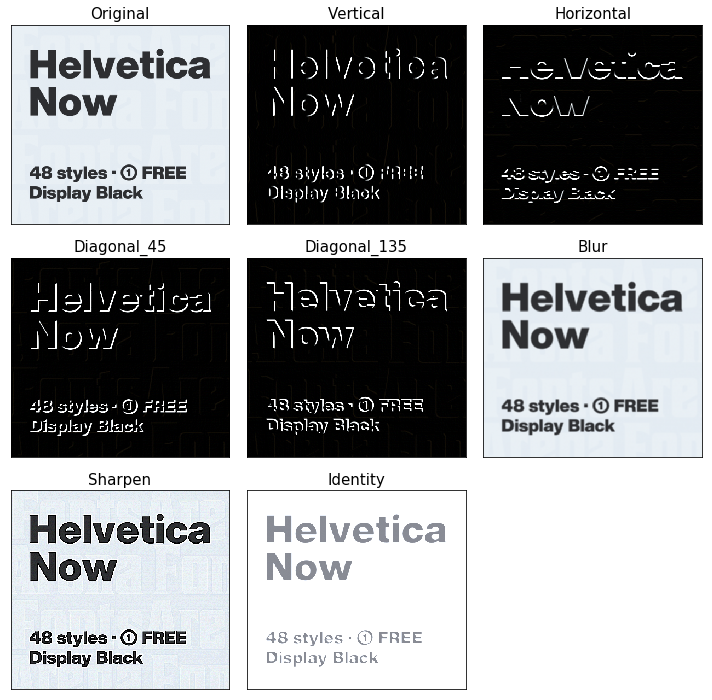

In [0]:
conv_obj = [image, dst, conv_hor, conv_45, conv_135, conv_blur, conv_sharp, conv_identity]
type_detection = ['Original', 'Vertical', 'Horizontal', 'Diagonal_45', 'Diagonal_135', 'Blur', 'Sharpen', 'Identity']

visualise_edge_detection(conv_obj, type_detection)